In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [3]:
train_data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [4]:
train_data[['unpaid_principal_bal', 'loan_term',
       'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type']].head()

,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type
0,214000,360,95,1.0,22.0,694.0,30.0,0.0,0.0
1,144000,360,72,1.0,44.0,697.0,0.0,0.0,0.0
2,366000,180,49,1.0,33.0,780.0,0.0,0.0,0.0
3,135000,360,46,2.0,44.0,633.0,0.0,638.0,0.0
4,124000,360,80,1.0,43.0,681.0,0.0,0.0,0.0


In [5]:
train_data[train_data['co-borrower_credit_score'] > 0].head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
3,601385667462,X,OTHER,4.75,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
9,308990846816,X,OTHER,4.00,214000,360,2012-01-01,03/2012,95,2.0,...,0,0,1,1,1,1,1,2,2,1
22,897810643785,X,OTHER,3.25,127000,120,2012-01-01,03/2012,62,2.0,...,0,0,1,0,1,1,0,0,1,1
25,757687253558,X,OTHER,4.50,246000,360,2012-02-01,04/2012,90,2.0,...,0,0,0,0,0,0,0,1,2,1
26,477152543889,Y,OTHER,3.75,77000,180,2012-02-01,04/2012,85,2.0,...,0,0,0,0,0,0,0,0,1,1


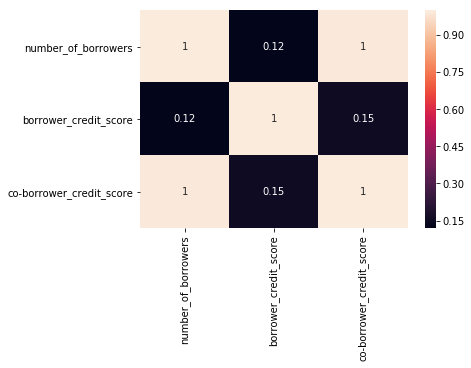

In [17]:
sns.heatmap(train_data[['number_of_borrowers', 'borrower_credit_score', 'co-borrower_credit_score']].corr(), annot = True)
# sns.pairplot(train_data[['number_of_borrowers', 'co-borrower_credit_score']], kind='reg')

In [15]:
train_data[['number_of_borrowers', 'co-borrower_credit_score']].corr()

,number_of_borrowers,co-borrower_credit_score
number_of_borrowers,1.000000,0.996498
co-borrower_credit_score,0.996498,1.000000


In [21]:
train_data[train_data['insurance_type'] > 0].tail()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
113594,399077526191,X,"Miller, Mcclure and Allen",3.750,257000,360,2012-02-01,04/2012,90,1.0,...,0,0,0,0,0,0,0,0,0,0
113692,150622329045,X,OTHER,4.625,334000,360,2012-01-01,03/2012,97,1.0,...,0,0,0,0,0,0,0,0,0,0
113962,496862887815,Y,"Turner, Baldwin and Rhodes",4.750,90000,360,2012-01-01,03/2012,95,1.0,...,0,0,0,0,0,0,0,0,0,0
114500,500104187884,X,OTHER,4.500,130000,360,2012-02-01,04/2012,95,1.0,...,0,0,0,0,0,0,0,0,0,0
114844,961644159430,X,"Martinez, Duffy and Bird",5.050,95000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
target = train_data['m13']
train_data = train_data.drop('m13', axis=1)
train_data.shape

(116058, 28)

In [7]:
months = ['m'+str(i) for i in range(1, 13)]
months_data = train_data[months]

In [8]:
def apply_pca(pca_obj, components_list, n_components, data):
    components_data = data[components_list]
    applied_pca = pca_obj.transform(components_data)
    
    data = data.drop(components_list[n_components:], axis=1)
    data[components_list[:n_components]] = applied_pca
    
    return data

In [9]:
min_max_scaler = MinMaxScaler().fit(months_data)
train_data[months] = min_max_scaler.transform(months_data)

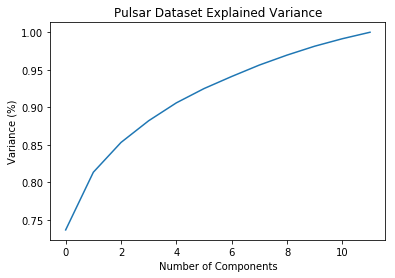

In [10]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(months_data)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [11]:
pca_months = PCA(n_components=10)
pca_months = pca_months.fit(months_data)

In [12]:
train_data = apply_pca(pca_months, months, 10, train_data)

In [13]:
# sns.heatmap(train_data[months[:10]].corr(), annot = True)
# sns.pairplot(train_data[months[:10]], kind='reg')

In [14]:
train_data['loan_purpose'].unique()

array(['C86', 'B12', 'A23'], dtype=object)

In [15]:
cleaned_train = train_data.drop(labels=['loan_id','source','financial_institution','origination_date','first_payment_date'], axis=1)
cleaned_train = pd.concat([cleaned_train, pd.get_dummies(cleaned_train['loan_purpose'], prefix='loan_purpose')], axis=1)
cleaned_train = cleaned_train.drop(labels=['loan_purpose'], axis=1)
cleaned_train.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,m4,m5,m6,m7,m8,m9,m10,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0.0,...,-0.040626,0.014830,-0.042480,0.025600,-0.024937,0.019138,-0.067237,0,0,1
1,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0.0,...,0.014549,-0.020466,-0.046795,-0.035611,0.013525,0.000608,-0.000292,0,1,0
2,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0.0,...,-0.001825,-0.001424,0.000002,-0.000318,0.000043,-0.000285,-0.000100,0,1,0
3,4.750,135000,360,46,2.0,44.0,633.0,0.0,638.0,0.0,...,0.035019,-0.019018,0.018868,0.004274,0.006530,-0.034775,-0.020178,0,1,0
4,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,0.0,...,-0.072797,-0.116803,0.082916,-0.080699,-0.098976,-0.022961,0.018168,0,0,1


In [16]:
non_scaled_list = ['loan_purpose_C86', 'loan_purpose_B12', 'loan_purpose_A23', 
                   'number_of_borrowers', 'insurance_type']

In [17]:
non_scaled = cleaned_train[non_scaled_list]
cleaned_train = cleaned_train.drop(non_scaled_list, axis=1)

In [18]:
std_scaler = StandardScaler().fit(cleaned_train)
train_cols_list = list(cleaned_train.columns)
cleaned_train = std_scaler.transform(cleaned_train)

cleaned_train = pd.DataFrame(cleaned_train, columns=train_cols_list)

cleaned_train = pd.concat([cleaned_train, non_scaled], axis=1)
cleaned_train.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,m1,m2,...,m6,m7,m8,m9,m10,loan_purpose_C86,loan_purpose_B12,loan_purpose_A23,number_of_borrowers,insurance_type
0,0.826517,0.050345,0.754428,1.594300,-0.898419,-1.798764,3.361200,-1.203344,0.890709,2.532023,...,-6.707014,3.780450,-2.833206,3.802284,-14.224331,1,0,0,1.0,0.0
1,2.182212,-0.560025,0.754428,0.264177,1.362454,-1.727692,-0.344138,-1.203344,1.180697,-1.263724,...,-7.389501,-5.175030,1.530072,0.171193,-0.046614,0,1,0,1.0,0.0
2,-1.342595,1.375719,-1.250874,-1.065945,0.232018,0.238642,-0.344138,-1.203344,-0.050986,-0.043879,...,0.011443,-0.011533,0.000619,-0.003764,-0.005998,0,1,0,1.0,0.0
3,1.911073,-0.638501,0.754428,-1.239439,1.362454,-3.243901,-0.344138,0.467052,4.705048,-3.374529,...,2.995207,0.660385,0.736542,-6.762269,-4.258132,0,1,0,2.0,0.0
4,1.911073,-0.734416,0.754428,0.726829,1.259687,-2.106744,-0.344138,-1.203344,68.425985,38.431910,...,13.124345,-11.771534,-11.232359,-4.447236,3.862839,1,0,0,1.0,0.0


In [19]:
X = np.asarray(cleaned_train)
y = np.asarray(target)

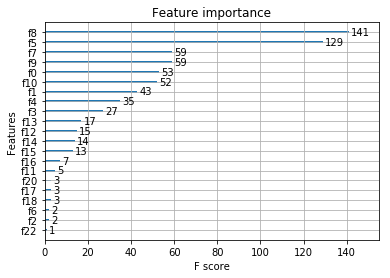

In [20]:
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
plt.show()

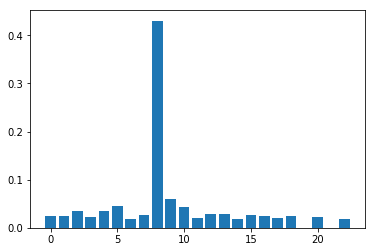

In [25]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [36]:
list(cleaned_train.columns)

['interest_rate',
 'unpaid_principal_bal',
 'loan_term',
 'loan_to_value',
 'debt_to_income_ratio',
 'borrower_credit_score',
 'insurance_percent',
 'co-borrower_credit_score',
 'm1',
 'm2',
 'm3',
 'm4',
 'm5',
 'm6',
 'm7',
 'm8',
 'm9',
 'm10',
 'loan_purpose_C86',
 'loan_purpose_B12',
 'loan_purpose_A23',
 'number_of_borrowers',
 'insurance_type']

In [37]:
important_features = cleaned_train.drop(['loan_purpose_C86', 'loan_purpose_B12', 
                                         'loan_purpose_A23', 'number_of_borrowers', 
                                         'insurance_type', 'insurance_percent'], axis=1)

In [38]:
important_features.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,borrower_credit_score,co-borrower_credit_score,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10
0,0.826517,0.050345,0.754428,1.594300,-0.898419,-1.798764,-1.203344,0.890709,2.532023,-0.979343,-2.684287,1.098115,-6.707014,3.780450,-2.833206,3.802284,-14.224331
1,2.182212,-0.560025,0.754428,0.264177,1.362454,-1.727692,-1.203344,1.180697,-1.263724,0.143205,1.065100,-1.373866,-7.389501,-5.175030,1.530072,0.171193,-0.046614
2,-1.342595,1.375719,-1.250874,-1.065945,0.232018,0.238642,-1.203344,-0.050986,-0.043879,-0.042635,-0.047592,-0.040257,0.011443,-0.011533,0.000619,-0.003764,-0.005998
3,1.911073,-0.638501,0.754428,-1.239439,1.362454,-3.243901,0.467052,4.705048,-3.374529,-2.158014,2.456094,-1.272488,2.995207,0.660385,0.736542,-6.762269,-4.258132
4,1.911073,-0.734416,0.754428,0.726829,1.259687,-2.106744,-1.203344,68.425985,38.431910,10.522642,-4.870490,-8.121039,13.124345,-11.771534,-11.232359,-4.447236,3.862839


In [39]:
X_imp = np.asarray(important_features)
y_imp = np.asarray(target)

In [43]:
classifier_rfc.fit(X_imp, y_imp)

/home/praneet/venv/deep_learning/lib/python3.5/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
classifier_adaboost.fit(X_imp, y_imp)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [45]:
classifier_rfc_adaboost.fit(X_imp, y_imp)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=10,
                         

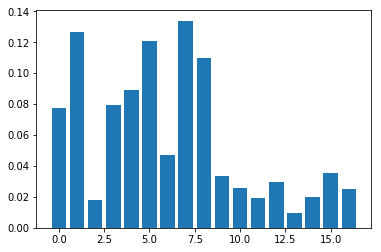

In [46]:
plt.bar(range(len(classifier_rfc.feature_importances_)), classifier_rfc.feature_importances_)
plt.show()

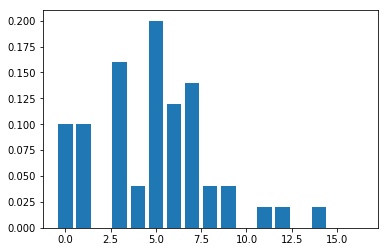

In [47]:
plt.bar(range(len(classifier_adaboost.feature_importances_)), classifier_adaboost.feature_importances_)
plt.show()

/home/praneet/venv/deep_learning/lib/python3.5/site-packages/sklearn/tree/tree.py:527: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


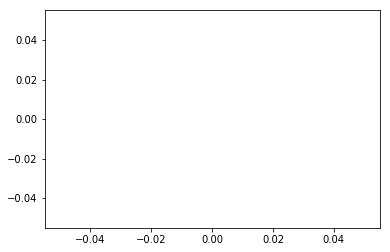

In [48]:
plt.bar(range(len(classifier_rfc_adaboost.feature_importances_)), classifier_rfc_adaboost.feature_importances_)
plt.show()

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

param_grid = {'n_estimators': [100, 150], 'max_features': [10, 12, 14, 16]}
clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring=make_scorer(accuracy_score))

In [54]:
clf.fit(X_imp, y_imp)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [55]:
clf.cv_results_

{'mean_fit_time': array([26.12591367, 37.09917173, 29.60110245, 44.08544927, 33.51963606,
        50.40160046, 37.14751792, 50.99652214]),
 'mean_score_time': array([0.28936162, 0.43126111, 0.28784075, 0.42884002, 0.28287172,
        0.42412972, 0.28008056, 0.39822011]),
 'mean_test_score': array([0.99583829, 0.99576936, 0.99570043, 0.99577797, 0.99580382,
        0.99574351, 0.99575212, 0.99580382]),
 'param_max_features': masked_array(data=[10, 10, 12, 12, 14, 14, 16, 16],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 150, 100, 150, 100, 150, 100, 150],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 10, 'n_estimators': 100},
  {'max_features': 10, 'n_estimators': 150},
  {'max_features': 12, 'n_estimators': 100},
  {'max_features': 12, 'n_estimato

In [56]:
clf.best_params_

{'max_features': 10, 'n_estimators': 100}

In [35]:
X = np.asarray(cleaned_train)
y = np.asarray(target)

In [66]:
classifier_rfc = RandomForestClassifier(n_estimators=50)

In [41]:
classifier_adaboost = AdaBoostClassifier()

In [42]:
classifier_rfc_adaboost = AdaBoostClassifier(base_estimator=classifier_rfc)

In [67]:
classifier_rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
classifier_adaboost.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [31]:
classifier_rfc_adaboost.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=10,
                         

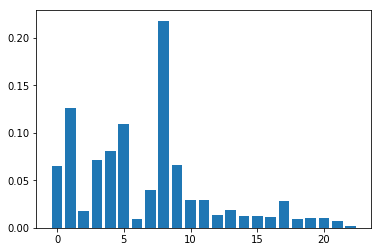

In [38]:
plt.bar(range(len(classifier_rfc.feature_importances_)), classifier_rfc.feature_importances_)
plt.show()

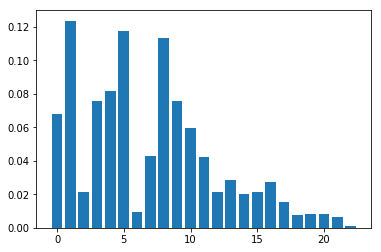

In [32]:
plt.bar(range(len(classifier_rfc.feature_importances_)), classifier_rfc.feature_importances_)
plt.show()

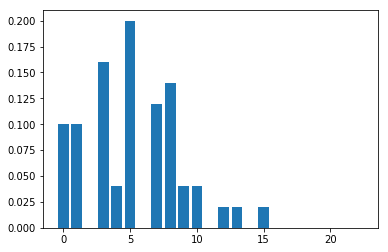

In [33]:
plt.bar(range(len(classifier_adaboost.feature_importances_)), classifier_adaboost.feature_importances_)
plt.show()

/home/praneet/venv/deep_learning/lib/python3.5/site-packages/sklearn/tree/tree.py:527: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


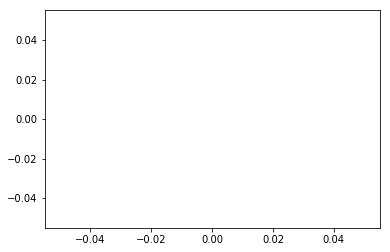

In [34]:
plt.bar(range(len(classifier_rfc_adaboost.feature_importances_)), classifier_rfc_adaboost.feature_importances_)
plt.show()

In [35]:
classifier_rfc_adaboost.feature_importances_

/home/praneet/venv/deep_learning/lib/python3.5/site-packages/sklearn/tree/tree.py:527: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [8]:
# from sklearn.utils import resample

# # separate minority and majority classes
# non_deliquent = cleaned_train[cleaned_train.m13==0]
# deliquent = cleaned_train[cleaned_train.m13==1]

# # upsample minority
# deliquent_upsampled = resample(deliquent,
#                           replace=True, # sample with replacement
#                           n_samples=len(non_deliquent), # match number in majority class
#                           random_state=358) # reproducible results

# # combine majority and upsampled minority
# upsampled = pd.concat([non_deliquent, deliquent_upsampled])

# # check new class counts
# upsampled.m13.value_counts()

1    115422
0    115422
Name: m13, dtype: int64

In [25]:
test_data = pd.read_csv('test.csv')
test_data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,...,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,...,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,...,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,...,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,...,0,0,0,0,0,0,0,0,0,0


In [26]:
test_data[months] = min_max_scaler.transform(test_data[months])
test_data = apply_pca(pca_months, months, 10, test_data)

In [27]:
cleaned_test = test_data.drop(labels=['loan_id','source','financial_institution','origination_date','first_payment_date'], axis=1)
cleaned_test = pd.concat([cleaned_test, pd.get_dummies(cleaned_test['loan_purpose'], prefix='loan_purpose')], axis=1)
cleaned_test = cleaned_test.drop(labels=['loan_purpose'], axis=1)
cleaned_test.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,m4,m5,m6,m7,m8,m9,m10,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,3.875,417000,360,75,1,20,790,0,0,0,...,-0.001825,-0.001424,0.000002,-0.000318,0.000043,-0.000285,-0.0001,1,0,0
1,4.500,113000,360,80,2,33,793,0,784,0,...,-0.001825,-0.001424,0.000002,-0.000318,0.000043,-0.000285,-0.0001,0,0,1
2,4.500,72000,360,75,1,34,710,0,0,0,...,-0.001825,-0.001424,0.000002,-0.000318,0.000043,-0.000285,-0.0001,0,0,1
3,4.125,123000,180,41,2,24,798,0,813,0,...,-0.001825,-0.001424,0.000002,-0.000318,0.000043,-0.000285,-0.0001,1,0,0
4,3.250,166000,180,53,2,12,767,0,768,0,...,-0.001825,-0.001424,0.000002,-0.000318,0.000043,-0.000285,-0.0001,1,0,0


In [28]:
non_scaled_test = cleaned_test[non_scaled_list]
cleaned_test = cleaned_test.drop(non_scaled_list, axis=1)

In [29]:
test_cols_list = list(cleaned_test.columns)

cleaned_test = std_scaler.transform(cleaned_test)

cleaned_test = pd.DataFrame(cleaned_test, columns=test_cols_list)

cleaned_test = pd.concat([cleaned_test, non_scaled_test], axis=1)
cleaned_test.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,m1,m2,...,m6,m7,m8,m9,m10,loan_purpose_C86,loan_purpose_B12,loan_purpose_A23,number_of_borrowers,insurance_type
0,0.013100,1.820417,0.754428,0.437672,-1.103953,0.475550,-0.344138,-1.203344,-0.050986,-0.043879,...,0.011443,-0.011533,0.000619,-0.003764,-0.005998,0,0,1,1,0
1,1.368795,-0.830331,0.754428,0.726829,0.232018,0.546622,-0.344138,0.849306,-0.050986,-0.043879,...,0.011443,-0.011533,0.000619,-0.003764,-0.005998,1,0,0,2,0
2,1.368795,-1.187834,0.754428,0.437672,0.334785,-1.419712,-0.344138,-1.203344,-0.050986,-0.043879,...,0.011443,-0.011533,0.000619,-0.003764,-0.005998,1,0,0,1,0
3,0.555378,-0.743136,-1.250874,-1.528596,-0.692885,0.665076,-0.344138,0.925233,-0.050986,-0.043879,...,0.011443,-0.011533,0.000619,-0.003764,-0.005998,0,0,1,2,0
4,-1.342595,-0.368194,-1.250874,-0.834619,-1.926088,-0.069338,-0.344138,0.807415,-0.050986,-0.043879,...,0.011443,-0.011533,0.000619,-0.003764,-0.005998,0,0,1,2,0


In [30]:
X_test = np.asarray(cleaned_test)

In [68]:
y_pred_rfc = classifier_rfc.predict(X_test)

In [29]:
y_pred_adaboost = classifier_adaboost.predict(X_test)

In [30]:
y_pred_rfc_adaboost = classifier_rfc_adaboost.predict(X_test)

In [69]:
indices = np.array([idx for idx in range(1,len(y_pred_rfc)+1)])

In [70]:
submission_data = pd.DataFrame({'loan_id': indices, 'm13': y_pred_rfc}).set_index('loan_id')
submission_data.to_csv('final_submission.csv')
submission_data.head()

,m13
loan_id,
1,0
2,0
3,0
4,0
5,0


In [34]:
submission_data = pd.DataFrame({'loan_id': indices, 'm13': y_pred_adaboost}).set_index('loan_id')
submission_data.to_csv('pca_std_scaler_adaboost_submission.csv')
submission_data.head()

,m13
loan_id,
1,0
2,0
3,0
4,0
5,0


In [35]:
submission_data = pd.DataFrame({'loan_id': indices, 'm13': y_pred_rfc_adaboost}).set_index('loan_id')
submission_data.to_csv('pca_std_scaler_rfc_adaboost_submission.csv')
submission_data.head()

,m13
loan_id,
1,0
2,0
3,0
4,0
5,0
